# Machine Learning model with Keras and TensorFlow


#### Dataset used
    
    Iris flower (iris) dataset. 
    The dataset contains a set of 150 records under five attributes: 
    sepal length, sepal width, petal length, petal width, and class (known as target from sklearn datasets).

### 1. Sequential Model - most simple and most frequently used model
### 2. Functional API - for more complex models. In particular model with multiple inputs or outputs.

### Importing useful libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Exploring Data

### Preparing Pandas Datafame

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Preparing data for Keras and TensorFlow

Converting categorical feature to one-hot encoding. 

In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


    Creating X and y. 
    Keras and TensorFlow 2.0 take in Numpy array as inputs, converting DataFrame back to Numpy array.

In [6]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

Finally, let’s split the dataset into a training set (75%)and a test set (25%) using train_test_split() from sklearn libra

In [7]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

In [8]:
## X_train

## 1. Sequential model

1. Sequential model

        The Sequential model is a linear stack of layers. There are 2 ways to create a Sequential model

        Passing a list of layers to the constructor
        Simply add layers via the .add() method:


####  _______________Information about the input shape is mentioned in the first layer_______________

In [9]:
# Passing a list of layers to the constructor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelA = Sequential([
    Dense(7, activation='relu', input_shape=(4,)),
    Dense(7, activation='relu'),
    Dense(3, activation='softmax'),
])

modelA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 35        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


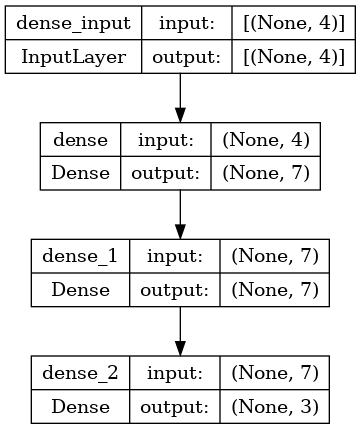

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(modelA, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### And above is identical to the following via the .add() method

In [11]:
# Adding layer via add() method
modelB = Sequential()
modelB.add(Dense(7, activation='relu', input_shape=(4,)))
modelB.add(Dense(7, activation='relu'))
modelB.add(Dense(3, activation='softmax'))

modelB.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 3)                 24        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


### 1.1 Training a Sequential model

1.1 Training a Sequential model

For training a Sequential model, first configure the model using model.compile(). The main arguments here are optimizer, loss and metric:

    Optimizer - RMSProps (rmsprop) or adam
    loss function - categorical cross-entropy  (categorical_crossentropy) for multiple-class classification problem
    Evaluation metrics - accuracy to evaluate the model during training and testing.

In [12]:
modelB.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#### Train the model - using model.fit() 

In [13]:
history = modelB.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 15,
                    validation_split=0.2
                   )

Epoch 1/15
2/2 [==============================] - 5s 233ms/step - loss: 1.9581 - accuracy: 0.3483 - val_loss: 1.9570 - val_accuracy: 0.3043
Epoch 2/15
2/2 [==============================] - 0s 31ms/step - loss: 1.8297 - accuracy: 0.3483 - val_loss: 1.8557 - val_accuracy: 0.3043
Epoch 3/15
2/2 [==============================] - 0s 29ms/step - loss: 1.7444 - accuracy: 0.3483 - val_loss: 1.7855 - val_accuracy: 0.3043
Epoch 4/15
2/2 [==============================] - 0s 29ms/step - loss: 1.6824 - accuracy: 0.3483 - val_loss: 1.7249 - val_accuracy: 0.3043
Epoch 5/15
2/2 [==============================] - 0s 29ms/step - loss: 1.6287 - accuracy: 0.3483 - val_loss: 1.6702 - val_accuracy: 0.3043
Epoch 6/15
2/2 [==============================] - 0s 28ms/step - loss: 1.5821 - accuracy: 0.3483 - val_loss: 1.6243 - val_accuracy: 0.3043
Epoch 7/15
2/2 [==============================] - 0s 29ms/step - loss: 1.5417 - accuracy: 0.3483 - val_loss: 1.5825 - val_accuracy: 0.3043
Epoch 8/15
2/2 [==========

### 1.2 Model Evaluation

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' ###SVG stands for Scalable Vector Graphics 
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

1.2 Model Evaluation

The Model can be evaluated graphically by doing the following:

    Plotting the progress on loss and accuracy metrics
    Testing the model against data that has never been used for training (testing data) 

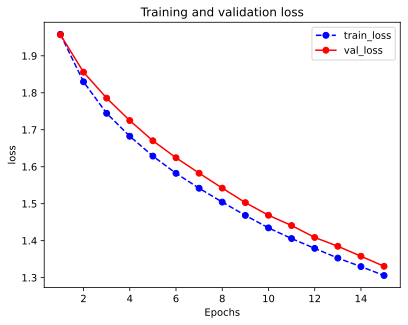

In [15]:
plot_metric(history, 'loss')

By running plot_metric(history, 'accuracy') to plot the progress on accuracy.

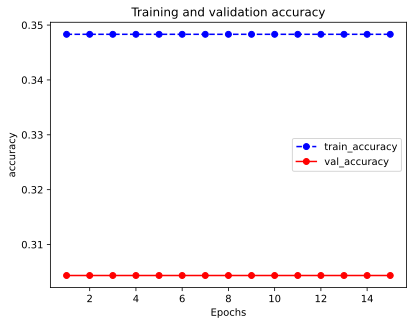

In [16]:
plot_metric(history, 'accuracy')

To test our model against test dataset

In [17]:
modelB.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1.3370 - accuracy: 0.3158


[1.3369510173797607, 0.31578946113586426]

## 2. Functional API

2. Functional API

    + The Keras functional API provides a more flexible way of defining models. 
    + In particular, it allows us to define multiple input or output models as well as models that share layers.

**Creating the same neural network using Functional API**

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


# This returns a tensor
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(5, activation='relu')(inputs)       #### first hidden layer
x = Dense(10, activation='relu')(x)           #### second hidden layer
outputs = Dense(3, activation='softmax')(x)   #### output layer

# This creates a model that includes
# the Input neurons and three Dense layers
model_fun_api = Model(inputs=inputs, outputs=outputs)

model_fun_api.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 5)                 25        
                                                                 
 dense_7 (Dense)             (None, 10)                60        
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


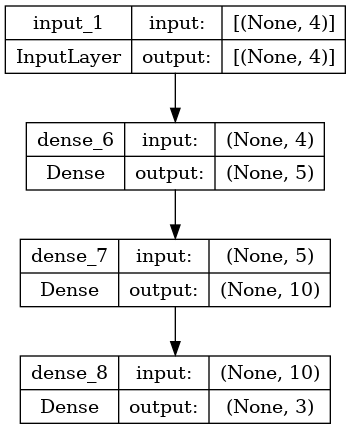

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model_fun_api, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In Functional API:

    Every layer instance is a callable on a tensor, and it returns a tensor
    Input() is used to define the input layer with input shape as an argumentshape=(4,)
    Only things we need to reference in Model() are the inputs and outputs tensors

## 2.1 Training a Functional API model

#### A Functional API model is trained just like Sequential model.

### 2.1 Training a Function API model
Such model can be trained just like Keras Sequential model

In [20]:
# First configure model using model.compile()
model_fun_api.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Then, train the model with fit()
history = model_fun_api.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 3,
                    validation_split=0.2
                   )

Epoch 1/3
2/2 [==============================] - 1s 176ms/step - loss: 1.9639 - accuracy: 0.3483 - val_loss: 1.9935 - val_accuracy: 0.3043
Epoch 2/3
2/2 [==============================] - 0s 30ms/step - loss: 1.8590 - accuracy: 0.3483 - val_loss: 1.9302 - val_accuracy: 0.3043
Epoch 3/3
2/2 [==============================] - 0s 30ms/step - loss: 1.7985 - accuracy: 0.3483 - val_loss: 1.8669 - val_accuracy: 0.3043


### 2.2 Model Evaludation

2.2 Model Evaluation

This model can be evaluated just like we did in Sequential model

By running plot_metric(history, 'loss') to plot the progress on loss.

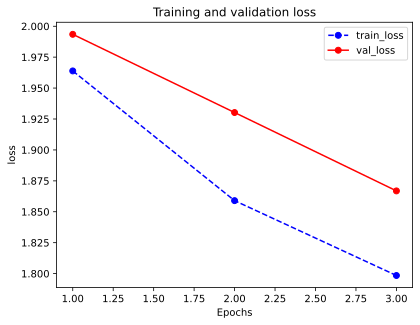

In [21]:
plot_metric(history, 'loss')

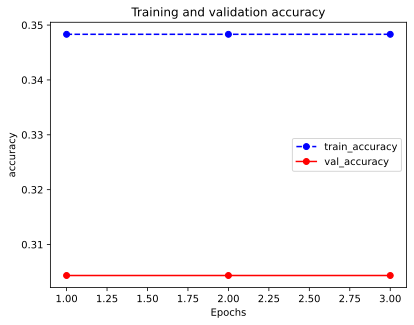

In [22]:
plot_metric(history, 'accuracy')

In [23]:
model_fun_api.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 6ms/step - loss: 1.7293 - accuracy: 0.3158


[1.7292914390563965, 0.31578946113586426]

### 2.3 Multi-input and multi-output model

    Models with multiple inputs or multiple outputs are good use cases for the Functional API. Consider the following scenarios:

    A model with 2 inputs and 1 output
    A model with 1 input and 2 outputs
    A model with 2 input and 2 outputs

For a model with 2 inputs and 1 output. Suppose we have image data and structured data for iris flower classification. A Machine Learning model can be built as:

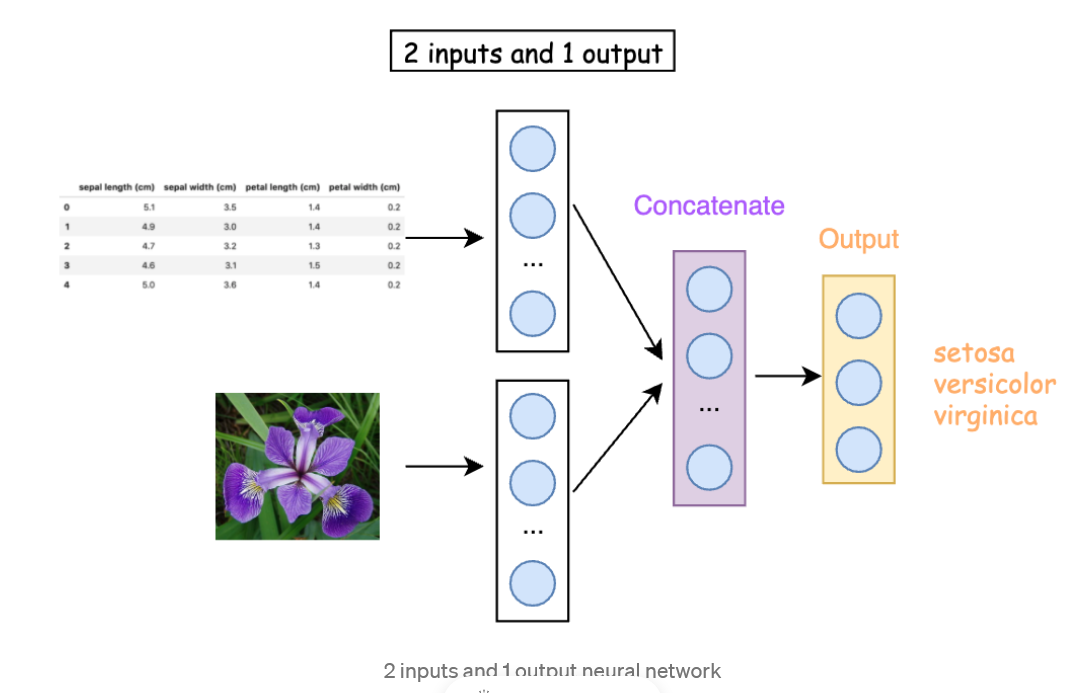

#### For the scenario with 2 inputs and 1 output

##### When there are 2 different inputs:
    
    we concatenate them using concatenate([x_1, x_2]). 
    To define a model with multiple inputs, we just need to specify a list of inputs, where inputs=[input_structure, input_image].

In [24]:
from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structure = Input(shape=(4,), name='input_structure')       ####Tabular data input
input_image = Input(shape=(256,), name='input_image')             #### Image data input 

# middle layers
x_1 = Dense(10, activation='relu')(input_structure)
x_2 = Dense(100, activation='relu')(input_image)

c = concatenate([x_1, x_2])

outputs = Dense(3, activation='sigmoid', name='outputs')(c)

model = Model(inputs=[input_structure, input_image], outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_structure (InputLayer)   [(None, 4)]          0           []                               
                                                                                                  
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 10)           50          ['input_structure[0][0]']        
                                                                                                  
 dense_10 (Dense)               (None, 100)          25700       ['input_image[0][0]']            
                                                                                            

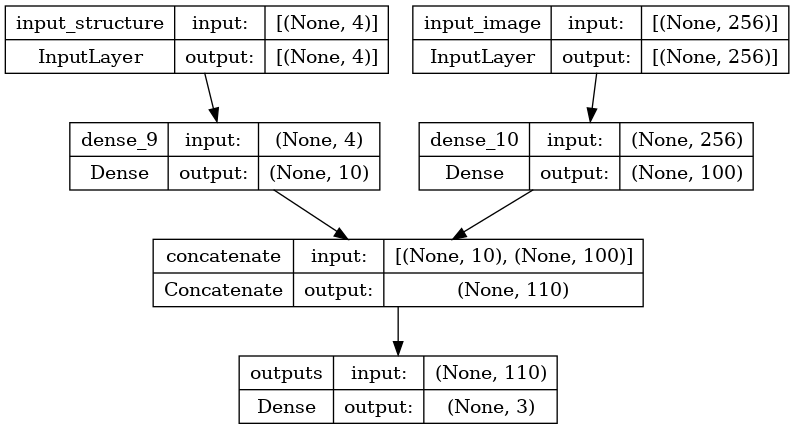

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### For the scenario with 1 input and 2 outputs

For a model with 1 input and 2 outputs. Suppose we only have image data and the task is to identify whether the given image is a flower and if yes, what type of iris flower it is?

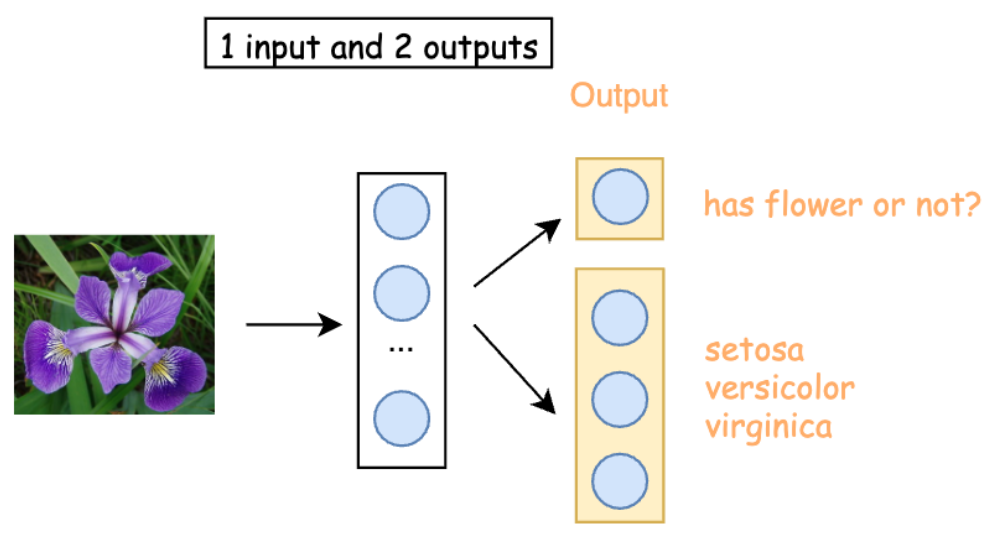

In [26]:
## 1 inputs, 2 output

from tensorflow.keras.layers import concatenate

# only one input
input_image = Input(shape=(256,), name='input_image')

# middle layer
x = Dense(300, activation='relu')(input_image)

# output layer
output_1 = Dense(1, activation='sigmoid', name='output_1')(x)
output_2 = Dense(3, activation='softmax', name='output_2')(x)

model = Model(inputs=input_image, outputs=[output_1, output_2])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 300)          77100       ['input_image[0][0]']            
                                                                                                  
 output_1 (Dense)               (None, 1)            301         ['dense_11[0][0]']               
                                                                                                  
 output_2 (Dense)               (None, 3)            903         ['dense_11[0][0]']               
                                                                                            

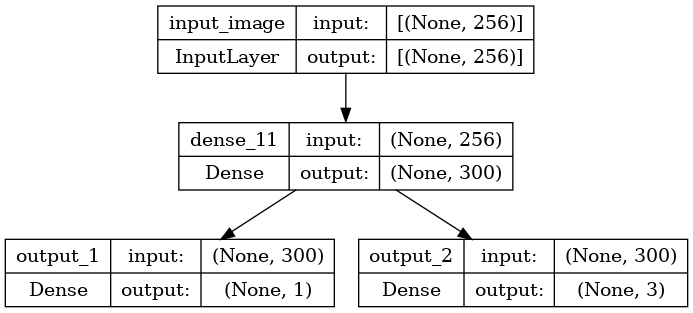

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### For the scenario with 2 inputs and 2 outputs

In [28]:
## 2 inputs, 2 outputs
from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structured = Input(shape=(4,), name='input_structured')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structured)
x_2 = Dense(300, activation='relu')(input_image)

c = concatenate([x_1, x_2])

# output layser
output_1 = Dense(1, activation='sigmoid', name='output_1')(c)
output_2 = Dense(3, activation='softmax', name='output_2')(c)

model = Model(inputs=[input_structured, input_image], outputs=[output_1, output_2])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_structured (InputLayer)  [(None, 4)]          0           []                               
                                                                                                  
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10)           50          ['input_structured[0][0]']       
                                                                                                  
 dense_13 (Dense)               (None, 300)          77100       ['input_image[0][0]']            
                                                                                            

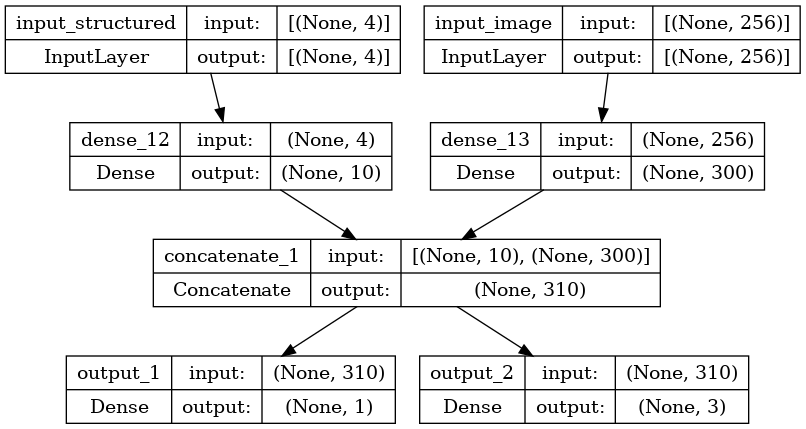

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)